In [19]:
#Importing data into pandas
import pandas as pd
df = pd.read_csv("clash_wiki_dataset.csv")
df.head()

,Card,Card Level (Spawn Level),Cost,Count,Crown Tower Damage,Damage,Damage per second,Death Damage,Health (+Shield),Hit Speed,...,Maximum Spawned,Radius,Range,Spawn DPS,Spawn Damage,Spawn Health,Spawn Speed,Spawner Health,Troop Spawned,Type
0,Archers,NaN,3.0,2,NaN,86,71,0.0,254,1.2,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,Troops and Defenses
1,Baby Dragon,NaN,4.0,1,NaN,133,83,0.0,"1,064",1.6,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,Troops and Defenses
2,Balloon,NaN,5.0,1,NaN,798,266,272.0,"1,396",3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Troops and Defenses
3,Bandit,NaN,3.0,1,NaN,160,160,0.0,780,1,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Troops and Defenses
4,Barbarians,NaN,5.0,4,NaN,159,106,0.0,636,1.5,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Troops and Defenses


In [20]:
df.dtypes

,0
Card,object
Card Level (Spawn Level),object
Cost,float64
Count,object
Crown Tower Damage,float64
Damage,object
Damage per second,object
Death Damage,float64
Health (+Shield),object
Hit Speed,object


In [21]:
# Select only the columns needed for balance analysis
analysis_df = df[[
    'Card',
    'Type',
    'Cost',
    'Damage per second',
    'Health (+Shield)'
]].copy()
analysis_df.head()

,Card,Type,Cost,Damage per second,Health (+Shield)
0,Archers,Troops and Defenses,3.0,71,254
1,Baby Dragon,Troops and Defenses,4.0,83,"1,064"
2,Balloon,Troops and Defenses,5.0,266,"1,396"
3,Bandit,Troops and Defenses,3.0,160,780
4,Barbarians,Troops and Defenses,5.0,106,636


In [22]:
#checking the types of columns to find any error or null value
analysis_df.dtypes

,0
Card,object
Type,object
Cost,float64
Damage per second,object
Health (+Shield),object


In [23]:
# Convert numeric columns from object/string to numeric values
analysis_df['Damage per second'] = pd.to_numeric(
    analysis_df['Damage per second'], errors='coerce'
)

analysis_df['Health (+Shield)'] = pd.to_numeric(
    analysis_df['Health (+Shield)'], errors='coerce'
)
analysis_df.dtypes

,0
Card,object
Type,object
Cost,float64
Damage per second,float64
Health (+Shield),float64


In [24]:
#checking missing values
analysis_df.isnull().sum()

,0
Card,0
Type,0
Cost,2
Damage per second,16
Health (+Shield),40


In [25]:
\
## Create a clean working dataset for efficiency-based metrics and dropping rows where DPS or cost is missing.
analysis_df_clean = analysis_df.dropna(
    subset=['Cost', 'Damage per second','Health (+Shield)']
).copy()
analysis_df_clean.isnull().sum()

,0
Card,0
Type,0
Cost,0
Damage per second,0
Health (+Shield),0


In [26]:
#calculating Damage per elixir and Health per elixir to check offensive and defensive efficiency.
analysis_df_clean['DPE'] = (
    analysis_df_clean['Damage per second'] /  #offensive efficiency
    analysis_df_clean['Cost']
)
analysis_df_clean['HPE'] = (
    analysis_df_clean['Health (+Shield)'] /    #defensive efficiency
    analysis_df_clean['Cost']
)
analysis_df_clean.head()

,Card,Type,Cost,Damage per second,Health (+Shield),DPE,HPE
0,Archers,Troops and Defenses,3.0,71.0,254.0,23.666667,84.666667
3,Bandit,Troops and Defenses,3.0,160.0,780.0,53.333333,260.000000
4,Barbarians,Troops and Defenses,5.0,106.0,636.0,21.200000,127.200000
5,Bats,Troops and Defenses,2.0,67.0,67.0,33.500000,33.500000
6,Battle Ram,Troops and Defenses,4.0,0.0,756.0,0.000000,189.000000


In [27]:
#calculate the average or mean efficiency values
mean_DPE = analysis_df_clean['DPE'].mean()
mean_HPE = analysis_df_clean['HPE'].mean()
mean_DPE, mean_HPE

(np.float64(31.61527777777778), np.float64(130.9206349206349))

In [28]:
# Calculate standard deviation to understand normal variation
std_DPE = analysis_df_clean['DPE'].std()
std_HPE = analysis_df_clean['HPE'].std()
std_DPE, std_HPE

(19.24143047189939, 75.36850349338283)

In [29]:
# Flag abnormal damage efficiency
analysis_df_clean['Status_DPE'] = 'Normal'
analysis_df_clean.loc[
    analysis_df_clean['DPE'] > mean_DPE + std_DPE, 'Status_DPE'
] = 'High DPE'

analysis_df_clean.loc[
    analysis_df_clean['DPE'] < mean_DPE - std_DPE, 'Status_DPE'
] = 'Low DPE'

#Flag abnormal health efficiency
analysis_df_clean['Status_HPE'] = 'Normal'
analysis_df_clean.loc[
    analysis_df_clean['HPE'] > mean_HPE + std_HPE, 'Status_HPE'
] = 'High HPE'
analysis_df_clean.loc[
    analysis_df_clean['HPE'] < mean_HPE - std_HPE, 'Status_HPE'
] = 'Low HPE'
analysis_df_clean [['Card', 'DPE','Status_DPE','HPE', 'Status_HPE']].head(10)

,Card,DPE,Status_DPE,HPE,Status_HPE
0,Archers,23.666667,Normal,84.666667,Normal
3,Bandit,53.333333,High DPE,260.000000,High HPE
4,Barbarians,21.200000,Normal,127.200000,Normal
5,Bats,33.500000,Normal,33.500000,Low HPE
6,Battle Ram,0.000000,Low DPE,189.000000,Normal
8,Bomber,47.333333,Normal,103.666667,Normal
10,Cannon,52.666667,High DPE,247.333333,High HPE
13,Dart Goblin,44.000000,Normal,72.000000,Normal
14,Electro Wizard,27.750000,Normal,147.500000,Normal
15,Elite Barbarians,28.166667,Normal,161.666667,Normal


In [30]:
#  Creating a new column that explains the balance state of each card

def diagnose_balance (row):

#If a card has a very High damage and High health for it's cost

 if row['Status_DPE'] == 'High DPE' and row['Status_HPE'] == 'High HPE':
  return 'Overpowered'

#If a card has a very High damage and Low health for it's cost

 elif row['Status_DPE'] =='High DPE' and row['Status_HPE'] == 'Low HP' :
  return 'Glass canon'

#If a card has a very Low damage and High health for it's cost

 elif row['Status_DPE'] == 'Low DPE' and row['Status_HPE'] == 'High HPE':
  return 'Defensive'

#If a card has a very Low damage and Low health for it's cost

 elif row['Status_DPE'] =='Low DPE' and row['Status_HPE'] == 'Low HPE' :
  return 'Underpowered'

 else : return 'Balanced'

analysis_df_clean ['Balance_diagnosis'] = analysis_df_clean.apply(
    diagnose_balance, axis=1)

analysis_df_clean.head(15)



,Card,Type,Cost,Damage per second,Health (+Shield),DPE,HPE,Status_DPE,Status_HPE,Balance_diagnosis
0,Archers,Troops and Defenses,3.0,71.0,254.0,23.666667,84.666667,Normal,Normal,Balanced
3,Bandit,Troops and Defenses,3.0,160.0,780.0,53.333333,260.000000,High DPE,High HPE,Overpowered
4,Barbarians,Troops and Defenses,5.0,106.0,636.0,21.200000,127.200000,Normal,Normal,Balanced
5,Bats,Troops and Defenses,2.0,67.0,67.0,33.500000,33.500000,Normal,Low HPE,Balanced
6,Battle Ram,Troops and Defenses,4.0,0.0,756.0,0.000000,189.000000,Low DPE,Normal,Balanced
8,Bomber,Troops and Defenses,3.0,142.0,311.0,47.333333,103.666667,Normal,Normal,Balanced
10,Cannon,Troops and Defenses,3.0,158.0,742.0,52.666667,247.333333,High DPE,High HPE,Overpowered
13,Dart Goblin,Troops and Defenses,3.0,132.0,216.0,44.000000,72.000000,Normal,Normal,Balanced
14,Electro Wizard,Troops and Defenses,4.0,111.0,590.0,27.750000,147.500000,Normal,Normal,Balanced
15,Elite Barbarians,Troops and Defenses,6.0,169.0,970.0,28.166667,161.666667,Normal,Normal,Balanced


In [31]:
# Selecting only cards that are NOT balanced
problem_cards = analysis_df_clean[
    analysis_df_clean['Balance_diagnosis'] != 'Balanced'
]

# Sorting by strongest offensive efficiency
problem_cards = problem_cards.sort_values(
    by='DPE',
    ascending=False
)

problem_cards[['Card', 'DPE', 'HPE', 'Balance_diagnosis']].head(15)

,Card,DPE,HPE,Balance_diagnosis
34,Lumberjack,71.250000,247.500000,Overpowered
35,Mega Minion,57.333333,231.666667,Overpowered
3,Bandit,53.333333,260.000000,Overpowered
10,Cannon,52.666667,247.333333,Overpowered
17,Fire Spirits,0.000000,45.500000,Underpowered


In [32]:
#suggesting balance action based on diagnosis

def suggest_action(row):
  if row['Balance_diagnosis'] == 'Overpowered':
    return 'Nerf damage or increase elixir cost'
  elif row['Balance_diagnosis'] == 'Underpowered':
    return 'Buff damage or reduce elixir cost'
  else:
    return 'No change needed'

analysis_df_clean['Suggested_action'] = analysis_df_clean.apply(suggest_action, axis=1)

analysis_df_clean.head(15)

,Card,Type,Cost,Damage per second,Health (+Shield),DPE,HPE,Status_DPE,Status_HPE,Balance_diagnosis,Suggested_action
0,Archers,Troops and Defenses,3.0,71.0,254.0,23.666667,84.666667,Normal,Normal,Balanced,No change needed
3,Bandit,Troops and Defenses,3.0,160.0,780.0,53.333333,260.000000,High DPE,High HPE,Overpowered,Nerf damage or increase elixir cost
4,Barbarians,Troops and Defenses,5.0,106.0,636.0,21.200000,127.200000,Normal,Normal,Balanced,No change needed
5,Bats,Troops and Defenses,2.0,67.0,67.0,33.500000,33.500000,Normal,Low HPE,Balanced,No change needed
6,Battle Ram,Troops and Defenses,4.0,0.0,756.0,0.000000,189.000000,Low DPE,Normal,Balanced,No change needed
8,Bomber,Troops and Defenses,3.0,142.0,311.0,47.333333,103.666667,Normal,Normal,Balanced,No change needed
10,Cannon,Troops and Defenses,3.0,158.0,742.0,52.666667,247.333333,High DPE,High HPE,Overpowered,Nerf damage or increase elixir cost
13,Dart Goblin,Troops and Defenses,3.0,132.0,216.0,44.000000,72.000000,Normal,Normal,Balanced,No change needed
14,Electro Wizard,Troops and Defenses,4.0,111.0,590.0,27.750000,147.500000,Normal,Normal,Balanced,No change needed
15,Elite Barbarians,Troops and Defenses,6.0,169.0,970.0,28.166667,161.666667,Normal,Normal,Balanced,No change needed


In [33]:
#creating final balance table
final_balance_table = analysis_df_clean.loc[analysis_df_clean['Suggested_action'] != 'No change needed',

['Card',
  'Type',
  'Cost',
  'DPE',
  'HPE',
  'Balance_diagnosis',
  'Suggested_action'
  ]]

final_balance_table

,Card,Type,Cost,DPE,HPE,Balance_diagnosis,Suggested_action
3,Bandit,Troops and Defenses,3.0,53.333333,260.000000,Overpowered,Nerf damage or increase elixir cost
10,Cannon,Troops and Defenses,3.0,52.666667,247.333333,Overpowered,Nerf damage or increase elixir cost
17,Fire Spirits,Troops and Defenses,2.0,0.000000,45.500000,Underpowered,Buff damage or reduce elixir cost
34,Lumberjack,Troops and Defenses,4.0,71.250000,247.500000,Overpowered,Nerf damage or increase elixir cost
35,Mega Minion,Troops and Defenses,3.0,57.333333,231.666667,Overpowered,Nerf damage or increase elixir cost


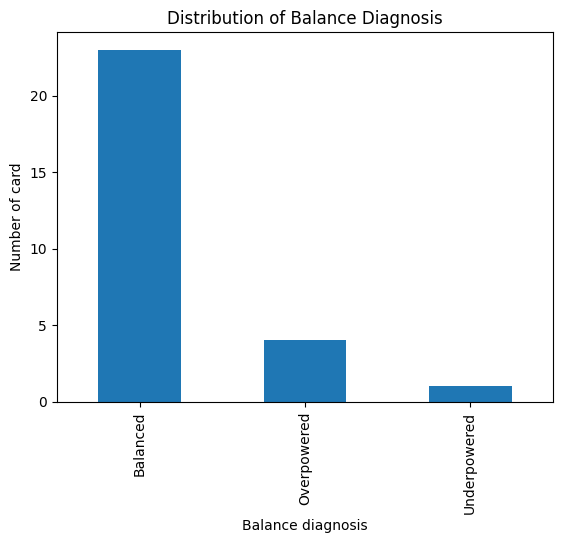

In [35]:
#creating a bar chart for proper visualizaiton
import matplotlib.pyplot as plt

analysis_df_clean['Balance_diagnosis'].value_counts().plot(kind='bar')
plt.title('Distribution of Balance Diagnosis')
plt.xlabel('Balance diagnosis')
plt.ylabel('Number of card')
plt.show()